# **Data Preparation**

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data = pd.read_csv('/content/Q2 Sentiment Analysis Dataset.csv', encoding='latin-1')

data.head()

,id,sentiment,date,text,Unnamed: 4,Unnamed: 5
0,623495523,1,Mon Dec 01 20:46:01 +0000 2014,WTF MY BATTERY WAS 31% ONE SECOND AGO AND NOW ...,NaN,NaN
1,623495527,1,Mon Dec 01 21:09:50 +0000 2014,@apple Contact sync between Yosemite and iOS8 ...,NaN,NaN
2,623495529,1,Mon Dec 01 21:35:14 +0000 2014,WARNING IF YOU BUY AN IPHONE 5S UNLOCKED FROM ...,NaN,NaN
3,623495536,1,Mon Dec 01 23:55:55 +0000 2014,"@Apple, For the love of GAWD, CENTER the '1'on...",NaN,NaN
4,623495537,1,Tue Dec 02 00:06:05 +0000 2014,i get the storage almost full notification lit...,NaN,NaN


# **Exploratory Data Analysis (EDA)**

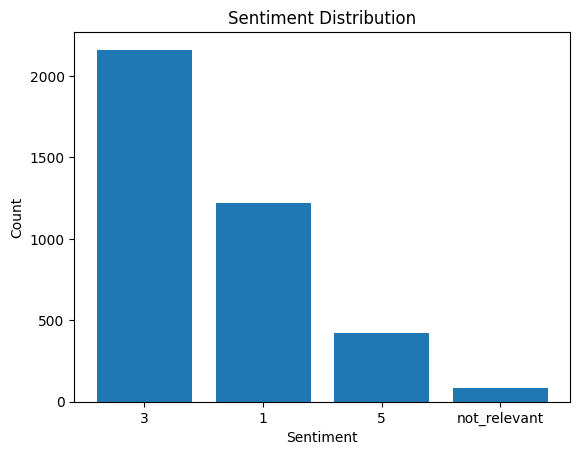

In [ ]:
#distribution of sentiment labels
counts = data['sentiment'].value_counts()

plt.bar(counts.index, counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
#checking NULL values
print(data.isnull().sum())

id               0
sentiment        0
date             0
text             0
Unnamed: 4    3886
Unnamed: 5    3886
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          3886 non-null   int64  
 1   sentiment   3886 non-null   object 
 2   date        3886 non-null   object 
 3   text        3886 non-null   object 
 4   Unnamed: 4  0 non-null      float64
 5   Unnamed: 5  0 non-null      float64
dtypes: float64(2), int64(1), object(3)
memory usage: 182.3+ KB


# **Preprocessing**

In [ ]:
#encoding
for i in range(len(data)):
    if data['sentiment'][i] == 'not_relevant':
        data['sentiment'][i] = '0'

data['sentiment'].value_counts()

<ipython-input-6-eea1345e1f7f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'][i] = '0'


3    2162
1    1219
5     423
0      82
Name: sentiment, dtype: int64

# **Text Preprocessing**

In [ ]:
data['text'] = data['text'].apply(lambda x: x.lower()) #lowercase conversion
data['text'] = data['text'].apply((lambda x: re.sub(r'[^a-zA-Z\s]', '', x))) #text cleaning
data['text'] = data['text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stopwords.words('english'))) #stopwords removal

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = text.split()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens] #lemmatization
    return ' '.join(lemmatized_tokens)

data['text'] = data['text'].apply(lemmatize_text)

In [ ]:
data['text'].head(5)

0                 wtf battery one second ago wtf apple
1    apple contact sync yosemite io seriously screw...
2    warning buy iphone unlocked apple iphone canno...
3    apple love gawd center damn calendar app fixed...
4    get storage almost full notification literally...
Name: text, dtype: object

# **Feature Extraction**

In [ ]:
vectorizer = CountVectorizer()

X_bow_rawcounts = vectorizer.fit_transform(data['text']) #Bag of words based on raw counts
vectorizer.get_feature_names_out()

array(['aa', 'aaaron', 'aapl', ..., 'zuckerberg', 'zuckerbergs', 'zum'],
      dtype=object)

In [ ]:
X_bow_rawcounts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [ ]:
transformer = TfidfTransformer()

X_bow_tfidf = transformer.fit_transform(X_bow_rawcounts) #Bag of words based on TfIDF

In [ ]:
X_bow_tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.21042171, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.13074216, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.10520791, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
ngram_vectorizer = CountVectorizer(ngram_range=(1, 3), token_pattern=r'\b\w+\b', min_df=1)

X_ngrams = ngram_vectorizer.fit_transform(data['text']) #ngrams (unigrams, bigrams, trigrams)
ngram_vectorizer.get_feature_names_out()

array(['aa', 'aa credit', 'aa credit rating', ..., 'zum', 'zum apple',
       'zum apple apple'], dtype=object)

In [ ]:
X_ngrams.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# **Model Training and Evaluation**

In [ ]:
def models_training(X_train, X_test, y_train, y_test):
    classifiers = {
        'Naive Bayes': MultinomialNB(),
        'Logistic Regression': LogisticRegression(max_iter=10000),
        'Random Forest': RandomForestClassifier(),
        'SVM': SVC(max_iter=10000),
        'Perceptron': Perceptron(max_iter=10000)
    }

    microAvg_results = {
        'Classifier Name': [],
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F-score': []
    }

    macroAvg_results = {
        'Classifier Name': [],
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F-score': []
    }

    for classifier_name, classifier in classifiers.items():
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        #micro average results
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average = 'micro')
        recall = recall_score(y_test, y_pred, average='micro')
        fscore = f1_score(y_test, y_pred, average='micro')

        microAvg_results['Classifier Name'].append(classifier_name)
        microAvg_results['Accuracy'].append(accuracy)
        microAvg_results['Precision'].append(precision)
        microAvg_results['Recall'].append(recall)
        microAvg_results['F-score'].append(fscore)

        #macro average results
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average = 'macro')
        recall = recall_score(y_test, y_pred, average='macro')
        fscore = f1_score(y_test, y_pred, average='macro')

        macroAvg_results['Classifier Name'].append(classifier_name)
        macroAvg_results['Accuracy'].append(accuracy)
        macroAvg_results['Precision'].append(precision)
        macroAvg_results['Recall'].append(recall)
        macroAvg_results['F-score'].append(fscore)

    microAvg_df = pd.DataFrame(microAvg_results)
    macroAvg_df = pd.DataFrame(macroAvg_results)

    return microAvg_df, macroAvg_df

In [ ]:
X = X_bow_rawcounts
y = data['sentiment'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

microAvg_df, macroAvg_df = models_training(X_train, X_test, y_train, y_test)

print(microAvg_df) #micro average measures report of models trained using Bag of words based on raw counts

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


       Classifier Name  Accuracy  Precision    Recall   F-score
0          Naive Bayes  0.700514   0.700514  0.700514  0.700514
1  Logistic Regression  0.751928   0.751928  0.751928  0.751928
2        Random Forest  0.727506   0.727506  0.727506  0.727506
3                  SVM  0.733933   0.733933  0.733933  0.733933
4           Perceptron  0.640103   0.640103  0.640103  0.640103


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(macroAvg_df) #macro average measures report of models trained using Bag of words based on raw counts

       Classifier Name  Accuracy  Precision    Recall   F-score
0          Naive Bayes  0.700514   0.576769  0.469636  0.480771
1  Logistic Regression  0.751928   0.546917  0.455672  0.473272
2        Random Forest  0.727506   0.511642  0.434777  0.451225
3                  SVM  0.733933   0.582471  0.414310  0.424145
4           Perceptron  0.640103   0.574851  0.509333  0.512969


In [ ]:
X = X_bow_tfidf
y = data['sentiment'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

microAvg_df, macroAvg_df = models_training(X_train, X_test, y_train, y_test)

print(microAvg_df) #micro average measures report of models trained using Bag of words based on TfIDF

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


       Classifier Name  Accuracy  Precision    Recall   F-score
0          Naive Bayes  0.735219   0.735219  0.735219  0.735219
1  Logistic Regression  0.735219   0.735219  0.735219  0.735219
2        Random Forest  0.733933   0.733933  0.733933  0.733933
3                  SVM  0.739075   0.739075  0.739075  0.739075
4           Perceptron  0.667095   0.667095  0.667095  0.667095


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(macroAvg_df) #macro average measures report of models trained using Bag of words based on TfIDF

       Classifier Name  Accuracy  Precision    Recall   F-score
0          Naive Bayes  0.735219   0.582916  0.411452  0.411578
1  Logistic Regression  0.735219   0.570970  0.423115  0.435726
2        Random Forest  0.733933   0.584765  0.426698  0.445592
3                  SVM  0.739075   0.594176  0.418761  0.431691
4           Perceptron  0.667095   0.464197  0.463872  0.463602


In [ ]:
X = X_ngrams
y = data['sentiment'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

microAvg_df, macroAvg_df = models_training(X_train, X_test, y_train, y_test)

print(microAvg_df) #micro average measures report of models trained using ngrams (unigrams, bigrams, trigrams)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


       Classifier Name  Accuracy  Precision    Recall   F-score
0          Naive Bayes  0.655527   0.655527  0.655527  0.655527
1  Logistic Regression  0.744216   0.744216  0.744216  0.744216
2        Random Forest  0.717224   0.717224  0.717224  0.717224
3                  SVM  0.713368   0.713368  0.713368  0.713368
4           Perceptron  0.685090   0.685090  0.685090  0.685090


In [ ]:
print(macroAvg_df) #macro average measures report of models trained using ngrams (unigrams, bigrams, trigrams)

       Classifier Name  Accuracy  Precision    Recall   F-score
0          Naive Bayes  0.655527   0.563351  0.533323  0.520787
1  Logistic Regression  0.744216   0.536218  0.441469  0.457035
2        Random Forest  0.717224   0.514762  0.415476  0.431201
3                  SVM  0.713368   0.596239  0.392388  0.399128
4           Perceptron  0.685090   0.519557  0.485928  0.493341
